<a href="https://colab.research.google.com/github/nalrobledo/template1/blob/main/NB_CTRCD_Modelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-learn==0.24.2  # versión compatible con eli5
!pip install eli5==0.11.0  # última versión conocida estable


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 39.9 MB/s eta 0:00:00
  Installing build dependencies ... canceled
ERROR: Operation cancelled by user
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.0/106.0 kB 4.2 MB/s eta 0:00:00


In [ ]:
#Importing the Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, precision_recall_curve
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

from sklearn.model_selection import StratifiedKFold

import warnings
warnings.filterwarnings('ignore')

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, roc_auc_score, recall_score,
                             f1_score, precision_score, confusion_matrix)
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.utils.metaestimators import available_if

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt



In [ ]:
from google.colab import files
uploaded= files.upload()

Saving cardiotox.zip to cardiotox.zip


In [ ]:
import zipfile
import io
data=zipfile.ZipFile(io.BytesIO(uploaded['cardiotox.zip']),'r')
data.extractall()

In [ ]:
### SOLO historial clinico

def import_data(from_file):
    results = []
    titles = []

    try:
        with open(from_file, 'r') as archivo:
            lineas = archivo.readlines()

            titles = lineas[0].strip().split(';')

            for linea in lineas[1:]:
                values = linea.strip().split(';')
                result_iteration = process_values(values)
                results.append(result_iteration)

    except FileNotFoundError:
        print(f"Error: El archivo {from_file} no fue encontrado.")
        return None
    except Exception as e:
        print(f"Error al leer el archivo: {str(e)}")
        return None

    df_var = pd.DataFrame(results, columns=titles[:27])
    return df_var

def process_values(values):
    return values[:27]

file = '/content/BC_cardiotox_clinical_and_functional_variables.csv'
df = import_data(file)

In [ ]:
df = df.apply(pd.to_numeric, errors='coerce')
df.fillna(0, inplace=True)
df.shape

(531, 27)

In [ ]:
data = df[(df['AC'] == 1) | (df['antiHER2'] == 1)]

In [ ]:
data = data.drop(columns=['heart_rhythm', 'LVDd','VALVprev','CIprev', 'ICMprev', 'ARRprev', 'VALVprev', 'DL','cxvalv','LAd', 'LVSd','DM','LVEF','AC'])
feature_names = ['heart_rate', 'age', 'weight', 'height', 'time', 'PWT','antiHER2','antiHER2prev', 'HTA', 'smoker', 'exsmoker', 'ACprev', 'RTprev']

X=data[feature_names]
y=data['CTRCD']

y.value_counts()

,count
CTRCD,
0,400
1,46


In [ ]:

numeric_columns = ['heart_rate', 'age', 'weight', 'height', 'time', 'PWT']
binary_columns = ['antiHER2', 'antiHER2prev', 'HTA', 'smoker', 'exsmoker', 'ACprev', 'RTprev']

def filter_data(X, y):
    """Aplica el filtro IQR a la clase 0 y luego la combina con la clase 1"""
    # Filtrar solo la clase 0
    X_0 = X[y == 0].copy()
    y_0 = y[y == 0].copy()

    # 🔹 **Aplicar IQR**
    Q1 = X_0[numeric_columns].quantile(0.30) #30
    Q3 = X_0[numeric_columns].quantile(0.70) #70
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.2 * IQR #1.2
    upper_bound = Q3 + 1.2 * IQR #1.2

    X_0_filtered = X_0[~((X_0[numeric_columns] < lower_bound) | (X_0[numeric_columns] > upper_bound)).any(axis=1)]
    y_0_filtered = y_0.loc[X_0_filtered.index]

    # 🔹 **Concatenar con la Clase 1 sin modificaciones**
    X_1 = X[y == 1].copy()
    y_1 = y[y == 1].copy()

    X_filtered = pd.concat([X_0_filtered, X_1])
    y_filtered = pd.concat([y_0_filtered, y_1])

    # 🔹 **Verificación Final**
    print(f"X_filtered shape: {X_filtered.shape}")
    print(f"y_filtered shape: {y_filtered.shape}")

    # Crear dataframe final filtrado
    df_filtered = pd.concat([X_filtered, y_filtered], axis=1)
    print(f"Dataframe final shape: {df_filtered.shape}")

    return X_filtered, y_filtered

print("🔹 Primera ejecución:")
X, y = filter_data(X, y)

print("\n🔹 Segunda ejecución:")
X, y = filter_data(X, y)

🔹 Primera ejecución:
X_filtered shape: (273, 13)
y_filtered shape: (273,)
Dataframe final shape: (273, 14)

🔹 Segunda ejecución:
X_filtered shape: (217, 13)
y_filtered shape: (217,)
Dataframe final shape: (217, 14)


In [ ]:
X.columns

Index(['heart_rate', 'age', 'weight', 'height', 'time', 'PWT', 'antiHER2',
       'antiHER2prev', 'HTA', 'smoker', 'exsmoker', 'ACprev', 'RTprev'],
      dtype='object')

In [ ]:
y.value_counts()

,count
CTRCD,
0,171
1,46


**Logistic Regression**

In [ ]:
scale = ['heart_rate', 'age', 'weight', 'height', 'time', 'PWT']
ohe = ['antiHER2prev', 'HTA','smoker', 'exsmoker','ACprev', 'RTprev']

# Preprocesamiento de los datos
preprocessor = ColumnTransformer(
    transformers=[
        ('scale', StandardScaler(), scale),
        ('ohe', OneHotEncoder(handle_unknown='ignore'), ohe)
    ])

'''
# Modelo de Regresión Logística
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression(random_state=42))])
                        '''


model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression(
                            random_state=42,
                            max_iter=1000,
                            solver='liblinear'))])  # Puedes ajustar el solver si es necesario

# Número de grupos para la validación cruzada
n_groups = 10

# Almacenar métricas promedio y resultados de cada grupo
metrics = {'accuracy': [], 'roc_auc': [], 'recall': [], 'f1': [], 'precision': []}
roc_auc_scores = []  # Almacenar ROC AUC por grupo
recall_scores = []   # Almacenar Recall por grupo
group_results = []   # Para almacenar resultados de cada grupo

# Inicializar StratifiedKFold
kf = StratifiedKFold(n_splits=n_groups, shuffle=True, random_state=42)

# Listas para almacenar resultados generales
all_y_test = []
all_y_pred = []
all_y_pred_proba = []  # Agregado para curva ROC

# Umbral de clasificación ajustado
threshold = 0.5  # Ajusta este valor para obtener el mejor rendimiento

# Validación cruzada
for group_index, (train_index, test_index) in enumerate(kf.split(X, y)):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    # Muestreo balanceado de clases
    #sample_size = min(sum(y_train_fold == 0), sum(y_train_fold == 1), 25)  # Evita errores si hay pocas muestras
    sample_size = 35
    X_train_class_0_sampled = X_train_fold[y_train_fold == 0].sample(n=sample_size, random_state=group_index)
    X_train_class_1_sampled = X_train_fold[y_train_fold == 1].sample(n=sample_size, random_state=group_index)

    # Concatenar las muestras balanceadas
    X_train_balanced = pd.concat([X_train_class_0_sampled, X_train_class_1_sampled])
    y_train_balanced = pd.concat([y_train_fold[X_train_class_0_sampled.index],
                                  y_train_fold[X_train_class_1_sampled.index]])

    # Entrenar el modelo
    model.fit(X_train_balanced, y_train_balanced)
    y_pred_proba = model.predict_proba(X_test_fold)[:, 1]

    # Ajustar el umbral de clasificación
    y_pred_adjusted = (y_pred_proba >= threshold).astype(int)

    # Almacenar las etiquetas verdaderas y las predicciones ajustadas
    all_y_test.extend(y_test_fold)
    all_y_pred.extend(y_pred_adjusted)
    all_y_pred_proba.extend(y_pred_proba)  # Para curva ROC

    # Calcular métricas con el umbral ajustado
    accuracy = accuracy_score(y_test_fold, y_pred_adjusted)
    roc_auc = roc_auc_score(y_test_fold, y_pred_proba)
    recall = recall_score(y_test_fold, y_pred_adjusted)
    f1 = f1_score(y_test_fold, y_pred_adjusted)
    precision = precision_score(y_test_fold, y_pred_adjusted)

    # Almacenar métricas
    metrics['accuracy'].append(accuracy)
    metrics['roc_auc'].append(roc_auc)
    metrics['recall'].append(recall)
    metrics['f1'].append(f1)
    metrics['precision'].append(precision)

    # Almacenar resultados de este grupo
    group_results.append({
        'Group': group_index + 1,
        'Accuracy': accuracy,
        'ROC AUC': roc_auc,
        'Recall': recall,
        'F1 Score': f1,
        'Precision': precision
    })

print("\nResultados para LINEAR REGRESSION:")
print(f"Promedio Accuracy: {np.mean(metrics['accuracy']):.2f}")
print(f"Promedio ROC AUC: {np.mean(metrics['roc_auc']):.2f}")
print(f"Promedio Recall: {np.mean(metrics['recall']):.2f}")
print(f"Promedio F1 Score: {np.mean(metrics['f1']):.2f}")
print(f"Promedio Precision: {np.mean(metrics['precision']):.2f}")

print("\nResultados de cada grupo:")
for result in group_results:
    print(f"Grupo {result['Group']} - Accuracy: {result['Accuracy']:.2f}, "
          f"ROC AUC: {result['ROC AUC']:.2f}, Recall: {result['Recall']:.2f}, "
          f"F1 Score: {result['F1 Score']:.2f}, Precision: {result['Precision']:.2f}")




Resultados para LINEAR REGRESSION:
Promedio Accuracy: 0.75
Promedio ROC AUC: 0.80
Promedio Recall: 0.77
Promedio F1 Score: 0.56
Promedio Precision: 0.46

Resultados de cada grupo:
Grupo 1 - Accuracy: 0.77, ROC AUC: 0.56, Recall: 0.50, F1 Score: 0.44, Precision: 0.40
Grupo 2 - Accuracy: 0.59, ROC AUC: 0.87, Recall: 0.80, F1 Score: 0.47, Precision: 0.33
Grupo 3 - Accuracy: 0.82, ROC AUC: 0.84, Recall: 0.80, F1 Score: 0.67, Precision: 0.57
Grupo 4 - Accuracy: 0.73, ROC AUC: 0.76, Recall: 0.80, F1 Score: 0.57, Precision: 0.44
Grupo 5 - Accuracy: 0.59, ROC AUC: 0.53, Recall: 0.20, F1 Score: 0.18, Precision: 0.17
Grupo 6 - Accuracy: 0.91, ROC AUC: 0.87, Recall: 0.80, F1 Score: 0.80, Precision: 0.80
Grupo 7 - Accuracy: 0.68, ROC AUC: 0.75, Recall: 0.80, F1 Score: 0.53, Precision: 0.40
Grupo 8 - Accuracy: 0.81, ROC AUC: 0.90, Recall: 1.00, F1 Score: 0.67, Precision: 0.50
Grupo 9 - Accuracy: 0.86, ROC AUC: 0.96, Recall: 1.00, F1 Score: 0.73, Precision: 0.57
Grupo 10 - Accuracy: 0.71, ROC AUC: 

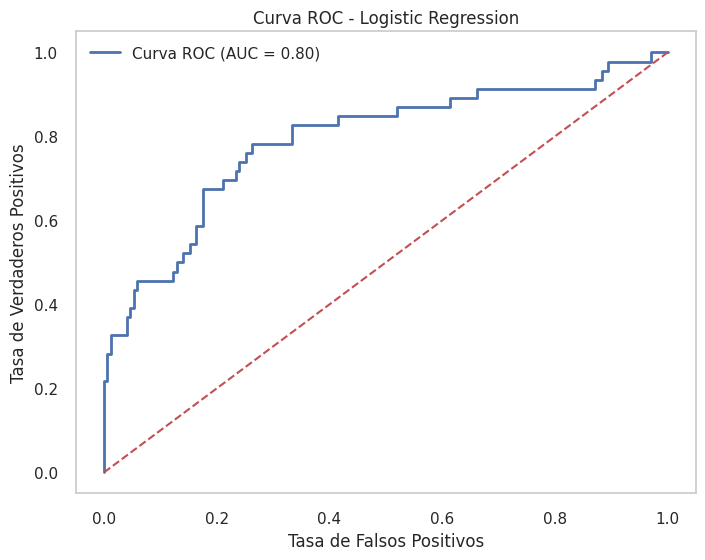

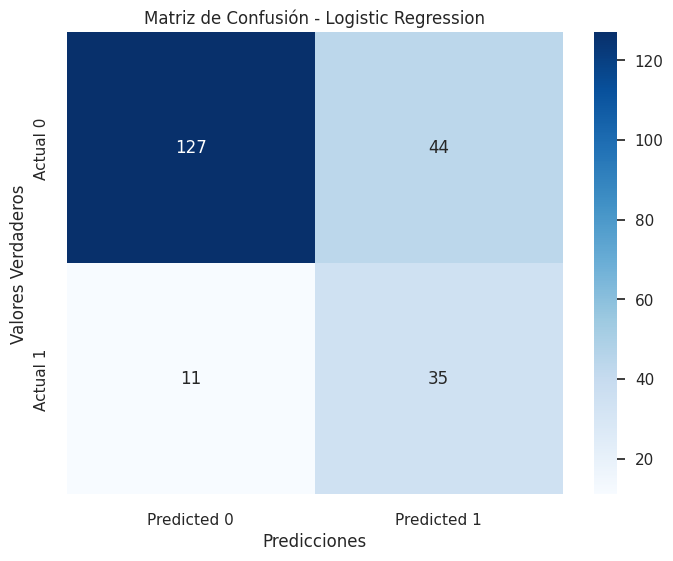

In [ ]:
# Curva ROC total
fpr, tpr, _ = roc_curve(all_y_test, all_y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'Curva ROC (AUC = {np.mean(metrics["roc_auc"]):.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='r')  # Línea de referencia
plt.title('Curva ROC - Logistic Regression')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.legend()
plt.grid()
plt.show()

# Matriz de confusión
final_cm_test = confusion_matrix(all_y_test, all_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(final_cm_test, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Matriz de Confusión - Logistic Regression')
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.show()

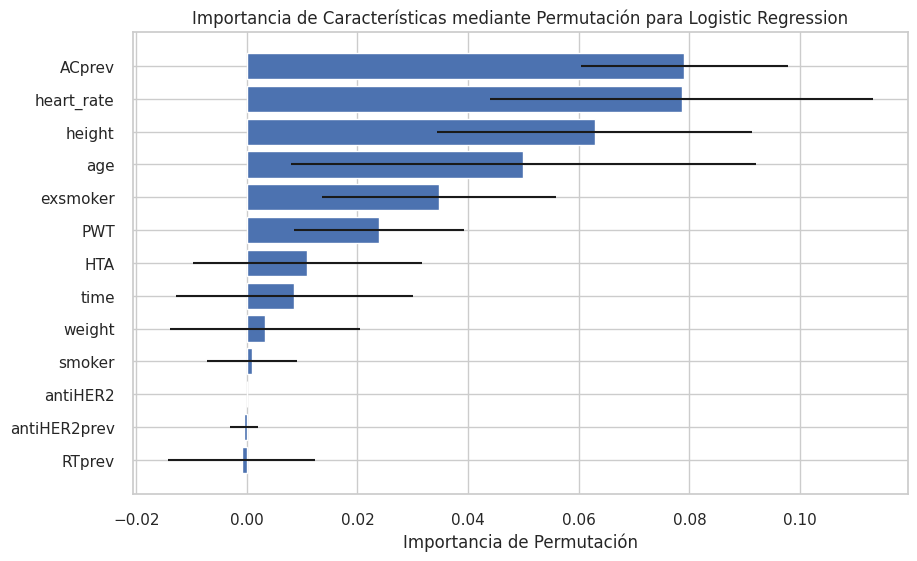

In [ ]:
perm_importance = permutation_importance(model,X_train_balanced, y_train_balanced, n_repeats=30, random_state=42)

sorted_idx = perm_importance.importances_mean.argsort()

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx], xerr=perm_importance.importances_std[sorted_idx])
plt.yticks(range(len(sorted_idx)), [X_test_fold.columns[i] for i in sorted_idx])
plt.xlabel("Importancia de Permutación")
plt.title("Importancia de Características mediante Permutación para Logistic Regression")
plt.show()

**Maquinas de soporte (SVC)**

In [ ]:
scale = ['heart_rate', 'age', 'weight', 'height', 'time', 'PWT']
ohe = ['antiHER2prev', 'HTA','smoker', 'exsmoker','ACprev', 'RTprev']


preprocessor = ColumnTransformer(
    transformers=[
        ('scale', StandardScaler(), scale),
        ('ohe', OneHotEncoder(handle_unknown='ignore'), ohe)
    ])


# Modelo SVC
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', SVC(probability=True, random_state=42))])


# Número de grupos para la validación cruzada
n_groups = 10

# Almacenar métricas promedio y resultados de cada grupo
metrics = {'accuracy': [], 'roc_auc': [], 'recall': [], 'f1': [], 'precision': []}
roc_auc_scores = []  # Almacenar ROC AUC por grupo
recall_scores = []   # Almacenar Recall por grupo
group_results = []   # Para almacenar resultados de cada grupo

# Inicializar StratifiedKFold
kf = StratifiedKFold(n_splits=n_groups, shuffle=True, random_state=42)

# Listas para almacenar resultados generales
all_y_test = []
all_y_pred = []
all_y_pred_proba = []  # Agregado para curva ROC

# Umbral de clasificación ajustado
threshold = 0.5  # Ajusta este valor para obtener el mejor rendimiento

# Validación cruzada
for group_index, (train_index, test_index) in enumerate(kf.split(X, y)):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    # Muestreo balanceado de clases
    #sample_size = min(sum(y_train_fold == 0), sum(y_train_fold == 1), 25)  # Evita errores si hay pocas muestras
    sample_size = 35
    X_train_class_0_sampled = X_train_fold[y_train_fold == 0].sample(n=sample_size, random_state=group_index)
    X_train_class_1_sampled = X_train_fold[y_train_fold == 1].sample(n=sample_size, random_state=group_index)

    # Concatenar las muestras balanceadas
    X_train_balanced = pd.concat([X_train_class_0_sampled, X_train_class_1_sampled])
    y_train_balanced = pd.concat([y_train_fold[X_train_class_0_sampled.index],
                                  y_train_fold[X_train_class_1_sampled.index]])

    # Entrenar el modelo
    model.fit(X_train_balanced, y_train_balanced)
    y_pred_proba = model.predict_proba(X_test_fold)[:, 1]

    # Ajustar el umbral de clasificación
    y_pred_adjusted = (y_pred_proba >= threshold).astype(int)

    # Almacenar las etiquetas verdaderas y las predicciones ajustadas
    all_y_test.extend(y_test_fold)
    all_y_pred.extend(y_pred_adjusted)
    all_y_pred_proba.extend(y_pred_proba)  # Para curva ROC

    # Calcular métricas con el umbral ajustado
    accuracy = accuracy_score(y_test_fold, y_pred_adjusted)
    roc_auc = roc_auc_score(y_test_fold, y_pred_proba)
    recall = recall_score(y_test_fold, y_pred_adjusted)
    f1 = f1_score(y_test_fold, y_pred_adjusted)
    precision = precision_score(y_test_fold, y_pred_adjusted)

    # Almacenar métricas
    metrics['accuracy'].append(accuracy)
    metrics['roc_auc'].append(roc_auc)
    metrics['recall'].append(recall)
    metrics['f1'].append(f1)
    metrics['precision'].append(precision)

    # Almacenar resultados de este grupo
    group_results.append({
        'Group': group_index + 1,
        'Accuracy': accuracy,
        'ROC AUC': roc_auc,
        'Recall': recall,
        'F1 Score': f1,
        'Precision': precision
    })

print("\nResultados para SVC:")
print(f"Promedio Accuracy: {np.mean(metrics['accuracy']):.2f}")
print(f"Promedio ROC AUC: {np.mean(metrics['roc_auc']):.2f}")
print(f"Promedio Recall: {np.mean(metrics['recall']):.2f}")
print(f"Promedio F1 Score: {np.mean(metrics['f1']):.2f}")
print(f"Promedio Precision: {np.mean(metrics['precision']):.2f}")

print("\nResultados de cada grupo:")
for result in group_results:
    print(f"Grupo {result['Group']} - Accuracy: {result['Accuracy']:.2f}, "
          f"ROC AUC: {result['ROC AUC']:.2f}, Recall: {result['Recall']:.2f}, "
          f"F1 Score: {result['F1 Score']:.2f}, Precision: {result['Precision']:.2f}")




Resultados para SVC:
Promedio Accuracy: 0.74
Promedio ROC AUC: 0.83
Promedio Recall: 0.78
Promedio F1 Score: 0.57
Promedio Precision: 0.47

Resultados de cada grupo:
Grupo 1 - Accuracy: 0.64, ROC AUC: 0.57, Recall: 0.50, F1 Score: 0.33, Precision: 0.25
Grupo 2 - Accuracy: 0.68, ROC AUC: 0.86, Recall: 1.00, F1 Score: 0.59, Precision: 0.42
Grupo 3 - Accuracy: 0.91, ROC AUC: 0.94, Recall: 1.00, F1 Score: 0.83, Precision: 0.71
Grupo 4 - Accuracy: 0.68, ROC AUC: 0.79, Recall: 0.80, F1 Score: 0.53, Precision: 0.40
Grupo 5 - Accuracy: 0.68, ROC AUC: 0.71, Recall: 0.60, F1 Score: 0.46, Precision: 0.38
Grupo 6 - Accuracy: 0.91, ROC AUC: 0.92, Recall: 0.80, F1 Score: 0.80, Precision: 0.80
Grupo 7 - Accuracy: 0.64, ROC AUC: 0.72, Recall: 0.60, F1 Score: 0.43, Precision: 0.33
Grupo 8 - Accuracy: 0.86, ROC AUC: 0.90, Recall: 0.75, F1 Score: 0.67, Precision: 0.60
Grupo 9 - Accuracy: 0.76, ROC AUC: 0.99, Recall: 1.00, F1 Score: 0.62, Precision: 0.44
Grupo 10 - Accuracy: 0.67, ROC AUC: 0.91, Recall: 

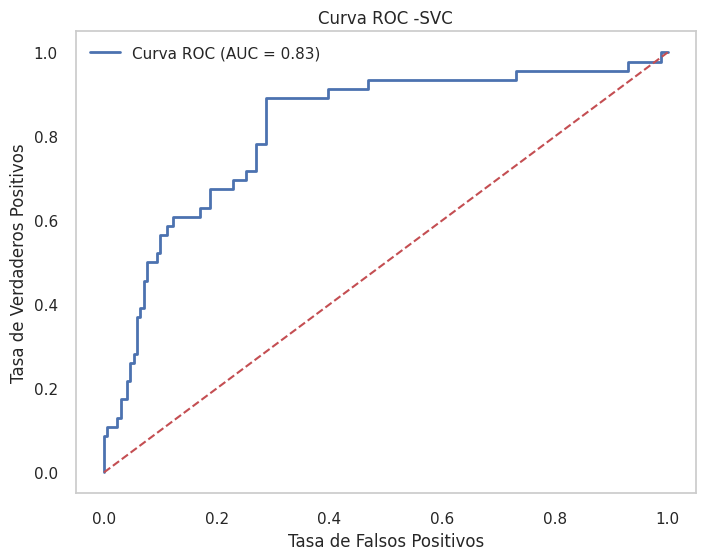

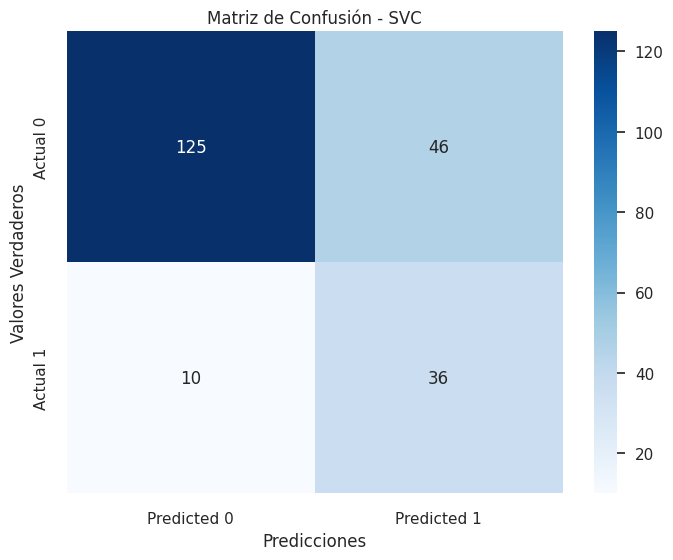

In [ ]:
# Curva ROC total
fpr, tpr, _ = roc_curve(all_y_test, all_y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'Curva ROC (AUC = {np.mean(metrics["roc_auc"]):.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='r')  # Línea de referencia
plt.title('Curva ROC -SVC')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.legend()
plt.grid()
plt.show()

# Matriz de confusión
final_cm_test = confusion_matrix(all_y_test, all_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(final_cm_test, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Matriz de Confusión - SVC')
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.show()

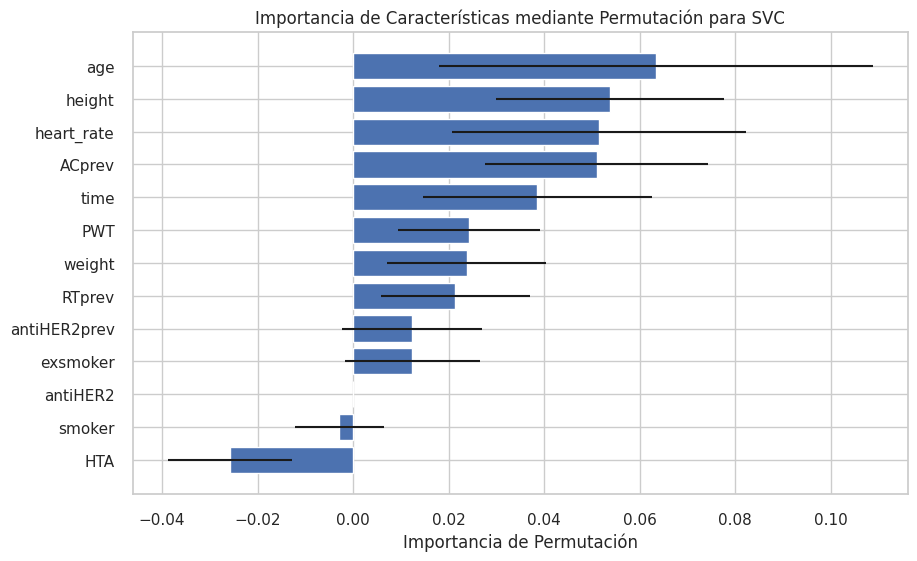

In [ ]:
perm_importance = permutation_importance(model,X_train_balanced, y_train_balanced, n_repeats=30, random_state=42)

# Ordena las importancias para visualizarlas
sorted_idx = perm_importance.importances_mean.argsort()

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx], xerr=perm_importance.importances_std[sorted_idx])
plt.yticks(range(len(sorted_idx)), [X_test_fold.columns[i] for i in sorted_idx])
plt.xlabel("Importancia de Permutación")
plt.title("Importancia de Características mediante Permutación para SVC")
plt.show()

**Gradient Boosting**

In [ ]:
scale = ['heart_rate', 'age', 'weight', 'height', 'time', 'PWT']
ohe = ['antiHER2prev', 'HTA','smoker', 'exsmoker','ACprev', 'RTprev']


preprocessor = ColumnTransformer(
    transformers=[
        ('scale', StandardScaler(), scale),
        ('ohe', OneHotEncoder(handle_unknown='ignore'), ohe)
    ])

'''
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(
        n_estimators=200,
        max_depth=4,
        min_samples_leaf=1,
        max_features='sqrt'  # Ajusta el peso de las clases automáticamente
    ))
])

'''

model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', GradientBoostingClassifier(
                            random_state=42,
                            n_estimators=200,
                            learning_rate=0.05,
                            max_depth=1,
                            subsample=0.8,
                            min_samples_split=2,
                            min_samples_leaf=1))])

# Número de grupos para la validación cruzada
n_groups = 10

# Almacenar métricas promedio y resultados de cada grupo
metrics = {'accuracy': [], 'roc_auc': [], 'recall': [], 'f1': [], 'precision': []}
roc_auc_scores = []  # Almacenar ROC AUC por grupo
recall_scores = []   # Almacenar Recall por grupo
group_results = []   # Para almacenar resultados de cada grupo

# Inicializar StratifiedKFold
kf = StratifiedKFold(n_splits=n_groups, shuffle=True, random_state=42)

# Listas para almacenar resultados generales
all_y_test = []
all_y_pred = []
all_y_pred_proba = []  # Agregado para curva ROC

# Umbral de clasificación ajustado
threshold = 0.5  # Ajusta este valor para obtener el mejor rendimiento

# Validación cruzada
for group_index, (train_index, test_index) in enumerate(kf.split(X, y)):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    # Muestreo balanceado de clases
    #sample_size = min(sum(y_train_fold == 0), sum(y_train_fold == 1), 25)  # Evita errores si hay pocas muestras
    sample_size = 35
    X_train_class_0_sampled = X_train_fold[y_train_fold == 0].sample(n=sample_size, random_state=group_index)
    X_train_class_1_sampled = X_train_fold[y_train_fold == 1].sample(n=sample_size, random_state=group_index)

    # Concatenar las muestras balanceadas
    X_train_balanced = pd.concat([X_train_class_0_sampled, X_train_class_1_sampled])
    y_train_balanced = pd.concat([y_train_fold[X_train_class_0_sampled.index],
                                  y_train_fold[X_train_class_1_sampled.index]])

    # Entrenar el modelo
    model.fit(X_train_balanced, y_train_balanced)
    y_pred_proba = model.predict_proba(X_test_fold)[:, 1]

    # Ajustar el umbral de clasificación
    y_pred_adjusted = (y_pred_proba >= threshold).astype(int)

    # Almacenar las etiquetas verdaderas y las predicciones ajustadas
    all_y_test.extend(y_test_fold)
    all_y_pred.extend(y_pred_adjusted)
    all_y_pred_proba.extend(y_pred_proba)  # Para curva ROC

    # Calcular métricas con el umbral ajustado
    accuracy = accuracy_score(y_test_fold, y_pred_adjusted)
    roc_auc = roc_auc_score(y_test_fold, y_pred_proba)
    recall = recall_score(y_test_fold, y_pred_adjusted)
    f1 = f1_score(y_test_fold, y_pred_adjusted)
    precision = precision_score(y_test_fold, y_pred_adjusted)

    # Almacenar métricas
    metrics['accuracy'].append(accuracy)
    metrics['roc_auc'].append(roc_auc)
    metrics['recall'].append(recall)
    metrics['f1'].append(f1)
    metrics['precision'].append(precision)

    # Almacenar resultados de este grupo
    group_results.append({
        'Group': group_index + 1,
        'Accuracy': accuracy,
        'ROC AUC': roc_auc,
        'Recall': recall,
        'F1 Score': f1,
        'Precision': precision
    })

print("\nResultados para gbm:")
print(f"Promedio Accuracy: {np.mean(metrics['accuracy']):.2f}")
print(f"Promedio ROC AUC: {np.mean(metrics['roc_auc']):.2f}")
print(f"Promedio Recall: {np.mean(metrics['recall']):.2f}")
print(f"Promedio F1 Score: {np.mean(metrics['f1']):.2f}")
print(f"Promedio Precision: {np.mean(metrics['precision']):.2f}")

print("\nResultados de cada grupo:")
for result in group_results:
    print(f"Grupo {result['Group']} - Accuracy: {result['Accuracy']:.2f}, "
          f"ROC AUC: {result['ROC AUC']:.2f}, Recall: {result['Recall']:.2f}, "
          f"F1 Score: {result['F1 Score']:.2f}, Precision: {result['Precision']:.2f}")




Resultados para gbm:
Promedio Accuracy: 0.70
Promedio ROC AUC: 0.79
Promedio Recall: 0.70
Promedio F1 Score: 0.49
Promedio Precision: 0.40

Resultados de cada grupo:
Grupo 1 - Accuracy: 0.64, ROC AUC: 0.71, Recall: 0.50, F1 Score: 0.33, Precision: 0.25
Grupo 2 - Accuracy: 0.59, ROC AUC: 0.89, Recall: 0.80, F1 Score: 0.47, Precision: 0.33
Grupo 3 - Accuracy: 0.82, ROC AUC: 0.78, Recall: 0.80, F1 Score: 0.67, Precision: 0.57
Grupo 4 - Accuracy: 0.64, ROC AUC: 0.72, Recall: 0.60, F1 Score: 0.43, Precision: 0.33
Grupo 5 - Accuracy: 0.68, ROC AUC: 0.67, Recall: 0.60, F1 Score: 0.46, Precision: 0.38
Grupo 6 - Accuracy: 0.82, ROC AUC: 0.85, Recall: 0.60, F1 Score: 0.60, Precision: 0.60
Grupo 7 - Accuracy: 0.77, ROC AUC: 0.79, Recall: 0.80, F1 Score: 0.62, Precision: 0.50
Grupo 8 - Accuracy: 0.76, ROC AUC: 0.81, Recall: 0.25, F1 Score: 0.29, Precision: 0.33
Grupo 9 - Accuracy: 0.62, ROC AUC: 0.84, Recall: 1.00, F1 Score: 0.50, Precision: 0.33
Grupo 10 - Accuracy: 0.67, ROC AUC: 0.88, Recall: 

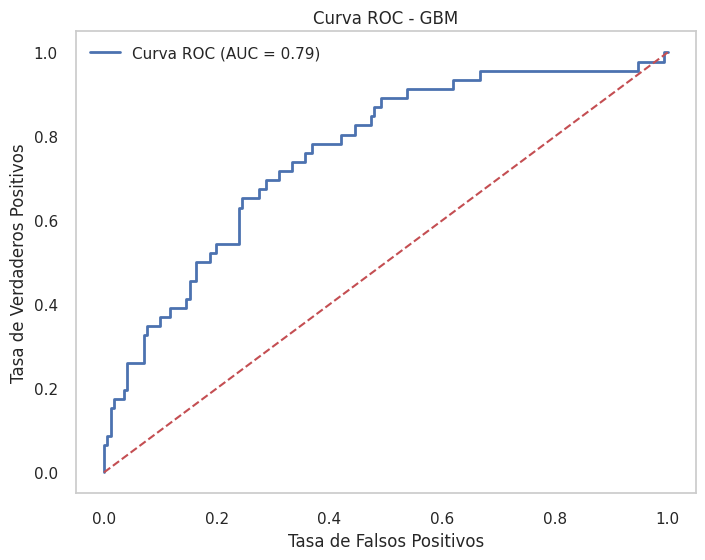

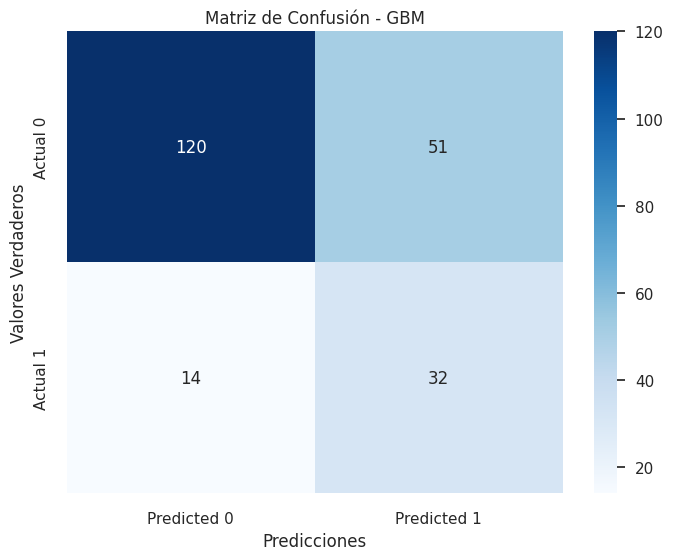

In [ ]:
# Curva ROC total
fpr, tpr, _ = roc_curve(all_y_test, all_y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'Curva ROC (AUC = {np.mean(metrics["roc_auc"]):.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='r')  # Línea de referencia
plt.title('Curva ROC - GBM')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.legend()
plt.grid()
plt.show()

# Matriz de confusión
final_cm_test = confusion_matrix(all_y_test, all_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(final_cm_test, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Matriz de Confusión - GBM')
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.show()

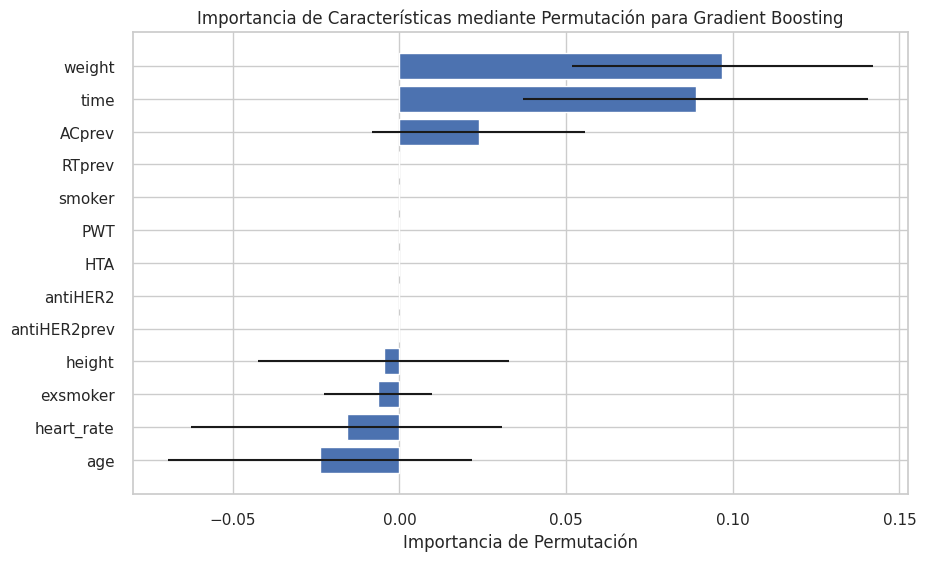

In [ ]:
perm_importance = permutation_importance(model, X_test_fold, y_test_fold, n_repeats=30, random_state=42)

# Ordena las importancias para visualizarlas
sorted_idx = perm_importance.importances_mean.argsort()

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx], xerr=perm_importance.importances_std[sorted_idx])
plt.yticks(range(len(sorted_idx)), [X_test_fold.columns[i] for i in sorted_idx])
plt.xlabel("Importancia de Permutación")
plt.title("Importancia de Características mediante Permutación para Gradient Boosting")
plt.show()